# **MN1: 2º parcial (programación) 17/06/2021**

<hr>

**Nombre:**

**NIU:**

**mail (gmail):**

<hr>

**Instrucciones de edición del Notebook y entrega**

*   Abre el Notebook desde GitHub ("Open in Colab") y genera una copia en tu Drive ("Guardar una copia en Drive"). Edita esa copia para el examen.
*   Renombra esa copia usando tu NIU como nombre de archivo: "NIU.ipynb" (*por ejemplo, 2055007.ipynb*)
*   Rellena tu nombre, NIU i mail (gmail o mail del campus, si quieres recibir los comentarios/feedback acerca de tu examen) en la cabecera de este Notebook.
*   Al final del examen, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](http://cern.ch/go/bkx9). Asegurate de que el fichero tiene el nombre correcto.
*   Podéis volver a subir el fichero si creéis que hay un error pero sólo consideraremos la última versión, y dentro del horario establecido.
*   **NOTA** Antes de entregar o dar por finalizado cada ejercicio, es recomendable reiniciar el entorno de ejecución para ver que se ejecuta todo de forma correcta: "Entorno de ejecución >> Reiniciar entorno de ejecución",y luego "Entorno de ejecución >> Ejecutar todas".

<hr>

**Instrucciones del examen**

*   El examen es de 9h a 12h. No se aceptarán entregas pasada esa hora.
*   Sólo se puede tener el notebook del examen abierto para trabajar, mientras se realiza el examen, y se permitirá conectarse a https://docs.python.org/3/library/index.html para hacer consultas de Python, u otras webs de programación de referencia, así como las prácticas realizadas durante el curso.
<hr>

## **EXAMEN**

In [ ]:
# Ejecuta esta parte de código para importar las librerías necesarias
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

## <font color='green'>**> Ejercicio #1 [3.5 puntos]**</font>

El método de integración numérica "importance sampling" es una variante del método de Monte Carlo que consiste en muestrear una función en más detalle allí donde tiene mayor peso (donde toma valores más altos) ya que esas son las regiones que contribuyen de forma mayoritaria al cálculo del área. Supongamos que queremos hallar la integral:

\begin{equation*}
    I = \int_{-\infty}^\infty dx\;f(x),\text{ con } f(x)=\frac{e^{-x^2}}{1+x^2}
\end{equation*}

Para aplicar este método elegimos una función $g(x)$ tal que sea integrable, no negativa y cuya integral $G(x)$ sea invertible y tenga el valor:

\begin{equation*}
    G(x) = \int_{-\infty}^x dx\;g(x) = 1 , \text{ cuando } x=\infty
\end{equation*}

Además, nos interesa que esa función $g(x)$ tenga aproximadamente la misma forma que la función que queremos integrar. En este caso particular, un buen candidato es una distribución gaussiana con $\mu=0$ y $\sigma=0.5$.

**1.1 [1.25 puntos]:** Realiza una gráfica de $f(x)$ y $g(x)$ para comprobar que efectivamente tienen una forma similar.

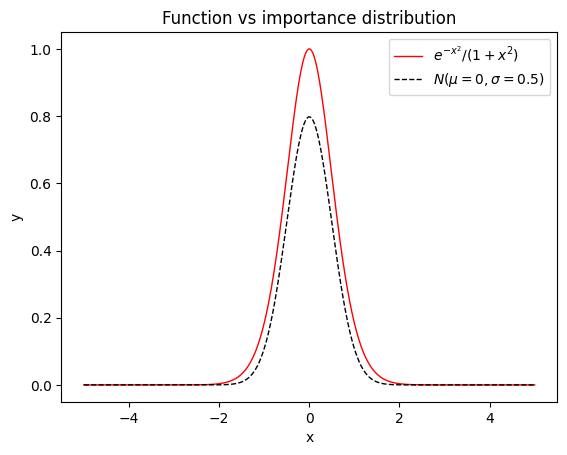

In [ ]:
# Ejercicio 1.1

def f(x):
  return(np.exp(-x**2)/(1+x**2))

def g(x):
  return(ss.norm.pdf(x, loc=0, scale=0.5)) #ss.norm.pdf(x, loc=0, scale=0.5) es una llamada a la función de densidad de probabilidad (PDF) de una distribución normal (gaussiana) usando SciPy,

xmin = -5
xmax = 5

x = np.linspace(xmin, xmax, 1000)

plt.plot(x, f(x), linewidth=1, color='red', label=r'$e^{-x^2}/(1+x^2)$')
plt.plot(x, g(x), linewidth=1, color='black', linestyle='--', label=r'$N(\mu=0,\sigma=0.5)$')
plt.title("Function vs importance distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Introducimos la función $g(x)$ en la integral del siguiente modo:

\begin{equation*}
    I = \int_{-\infty}^\infty dx\; f(x) =
    \int_{-\infty}^\infty dx\; f(x)\frac{g(x)}{g(x)} =
    \int_{-\infty}^\infty [dx\;g(x)] \frac{f(x)}{g(x)} =
    \int_{0}^1 dy\; \frac{f[G^{-1}(y)]}{g[G^{-1}(y)]}
\end{equation*}

Donde hemos utilizado el cambio de variable $y=G(x)$. $y=G(x)$ solo puede tomar valores entre 0 y 1, y estos valores siguen una distribución uniforme. Por lo tanto, aplicando el teorema de transformación visto en clase, la variable $G^{-1}(y)$ seguirá la distribución $g(x)$.

Para calcular esta integral de forma numérica debemos escribirla en forma de suma, es decir:

\begin{equation*}
    I \approx \frac{1}{N}\sum_{i=1}^N \frac{f[G^{-1}(y_i)]}{g[G^{-1}(y_i)]}
\end{equation*}

Donde $G^{-1}(y_i)$ es un conjunto de $N$ valores que siguen la distribución $g(x)$.

**1.2 [1.25 puntos]:** Calcula el valor de $I$ utilizando este método para $N$ entre 1000 y 100000, en pasos de 500, y realiza un gráfico comparándolo con el valor 1.34329.

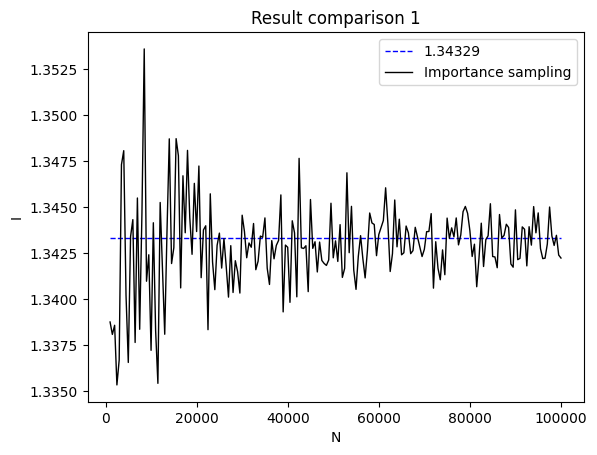

In [ ]:
Int1 = []  # Lista para guardar las estimaciones de la integral para diferentes tamaños de muestra

N_list = np.arange(1000, 100500, 500)  # Valores de N desde 1000 hasta 100000 en pasos de 500

sol = 1.34329  # Valor exacto o referencia de la integral para comparar

for N in N_list:
    # Generar N muestras aleatorias de la distribución normal N(0, 0.5^2)
    x_tries = ss.norm.rvs(loc=0, scale=0.5, size=N)

    # Evaluar la función f(x) en las muestras generadas
    num = f(x_tries)

    # Evaluar la función g(x) (PDF de la normal) en las muestras
    den = g(x_tries)

    # Calcular la estimación de la integral por importance sampling
    result = 1/N * sum(num / den)

    # Guardar el resultado en la lista
    Int1.append(result)

# Graficar el valor exacto de la integral como línea azul punteada
plt.plot(N_list, np.ones_like(N_list)*sol, linewidth=1, color='blue', linestyle='--', label='%s' % (sol))

# Graficar las estimaciones obtenidas con importance sampling en negro
plt.plot(N_list, Int1, linewidth=1, color='black', label=r'Importance sampling')

# Añadir título y etiquetas
plt.title("Result comparison 1")
plt.xlabel("N")
plt.ylabel("I")
plt.legend()
plt.show()


**1.3 [1 punto]:** Realiza la misma integral utilizando el método de Monte Carlo visto en clase muestreando en un área con $y_\text{min}=0$, $y_\text{max}=1$, $x_\text{min}=-5$, $x_\text{max}=5$ y repite el plot anterior comparando los tres resultados. ¿Qué método converge mejor?

>Nota: La función $f(x)$ cae rápidamente a 0 cuando $x\rightarrow\pm\infty$, por lo que podemos coger un área entre -5 y 5 sin alterar el resultado final de forma perceptible, durante todo este ejercicio.

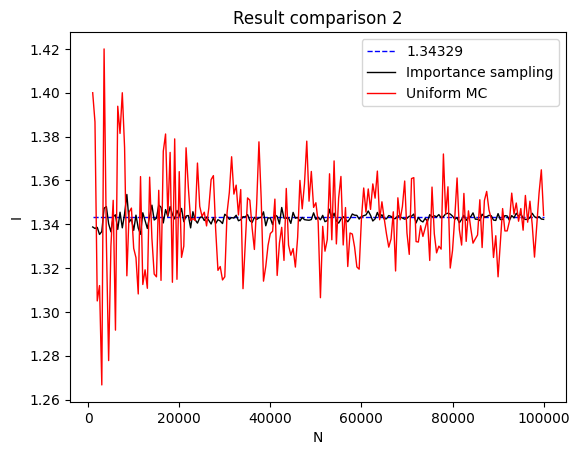

Importance sampling converge mejor al resultado de la integral


In [ ]:
Int2 = []  # Lista para guardar estimaciones de la integral usando Monte Carlo uniforme

xmin = -5  # Límite inferior en x
xmax = 5   # Límite superior en x
ymin = 0   # Límite inferior en y
ymax = 1   # Límite superior en y

for N in N_list:
    # Generar N muestras uniformes en el rectángulo definido por [xmin, xmax] x [ymin, ymax]
    x_tries = np.random.uniform(xmin, xmax, N)
    y_tries = np.random.uniform(ymin, ymax, N)

    # Seleccionar los puntos (x,y) que caen por debajo de la curva f(x)
    x_valid = x_tries[y_tries <= f(x_tries)]
    y_valid = y_tries[y_tries <= f(x_tries)]

    # Seleccionar los puntos que quedan por encima de la curva (no usados en el cálculo)
    x_novalid = x_tries[y_tries > f(x_tries)]
    y_novalid = y_tries[y_tries > f(x_tries)]

    # Estimar el área bajo la curva como proporción de puntos válidos multiplicado por el área total del rectángulo
    result = (xmax - xmin) * (ymax - ymin) * len(x_valid) / N

    # Guardar la estimación para el tamaño de muestra N
    Int2.append(result)

# Crear el gráfico comparativo
ax = plt.axes(title='Result comparison 2', xlabel='N', ylabel='I')

# Graficar valor exacto como línea azul punteada
ax.plot(N_list, np.ones_like(N_list)*sol, linewidth=1, color='blue', linestyle='--', label='%s' % (sol))

# Graficar estimaciones con importance sampling en negro
ax.plot(N_list, Int1, linewidth=1, color='black', label=r'Importance sampling')

# Graficar estimaciones con muestreo uniforme en rojo
ax.plot(N_list, Int2, linewidth=1, color='red', label=r'Uniform MC')

plt.legend()
plt.show()

# Mensaje en consola con conclusión sobre la convergencia
print("Importance sampling converge mejor al resultado de la integral")


## <font color='green'>**> Ejercicio #2 [3.5 puntos]**</font>

Delante de ti, a una distancia de $10$ $m$ y a una altura de $1.75$ $m$, se encuentra el centro de una diana. Esta diana tiene diferentes secciones de puntos, máximo en el centro (5) y que decrece con el radio, cada $3$ $cm$, hasta llegar a una puntuación de 1, como muestra la Figura. Tú lanzas tres dardos desde una altura de $1.5$ $m$ hacia la diana.

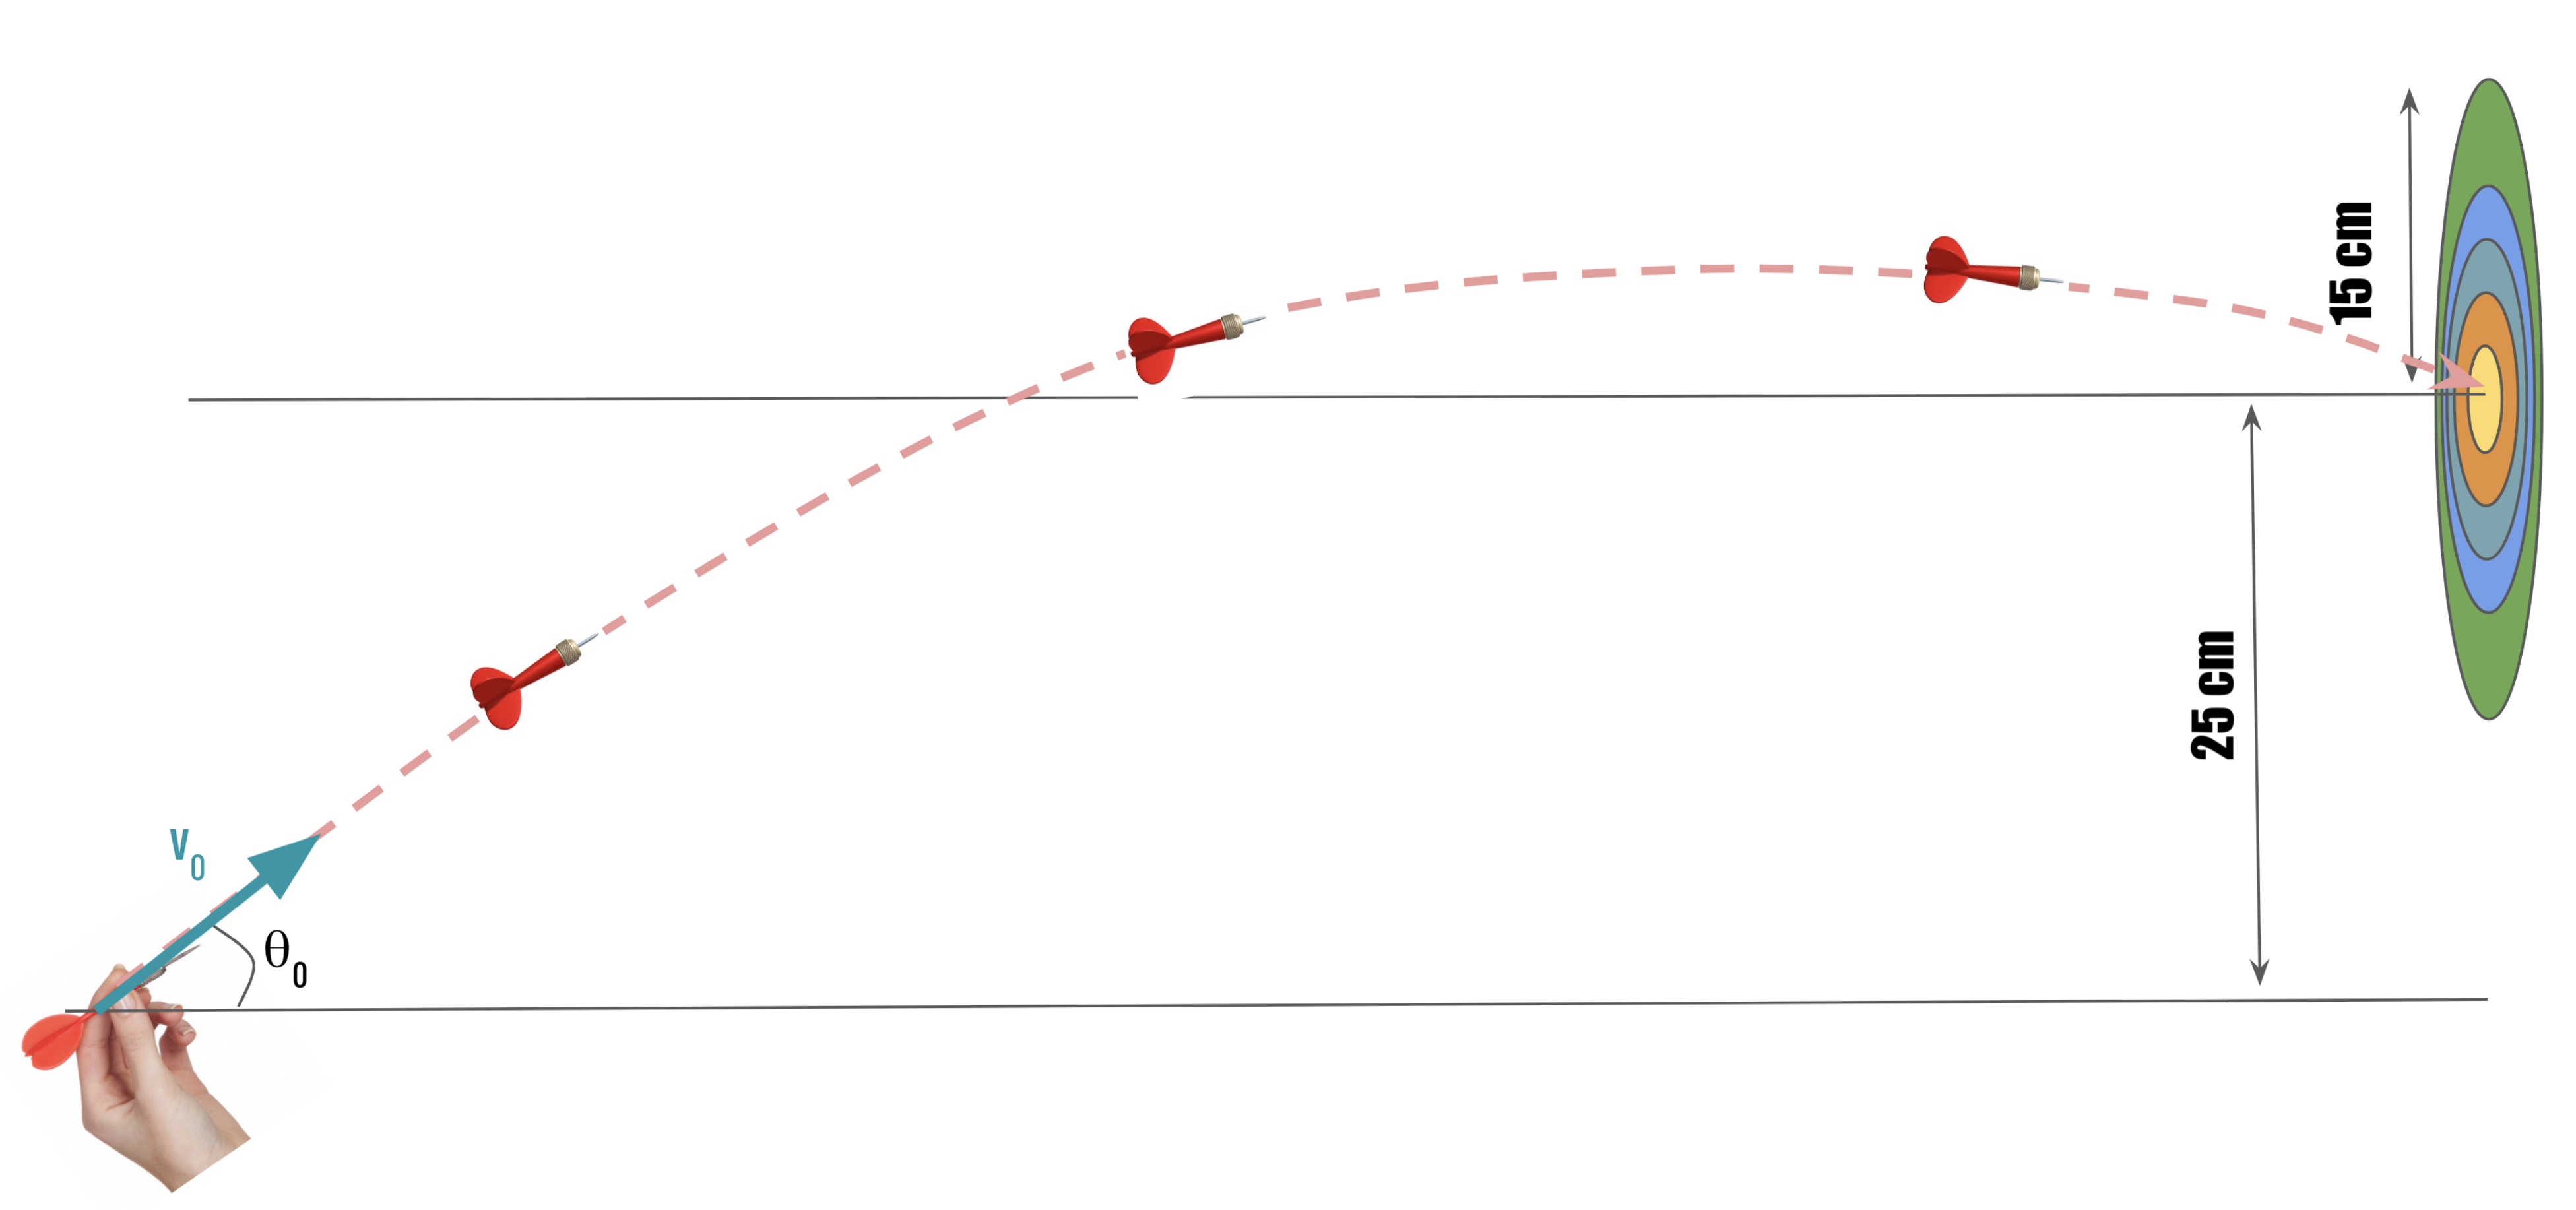

**2.1 [1.25 puntos]:** Para un ángulo de tiro de $5º$, calcula el módulo de la velocidad de salida del dardo de manera que des justo en el centro de la diana. Haz una representación gráfica de la trayectória del dardo en el plano (x,z), y la posición de la diana (puedes graficarla de forma lateral con las diferentes secciones de puntuación en diferente color). Asume $g = 9.81$ $m/s^2$, y que no hay fricción con el aire, durante el ejercicio.

*Hint:* En el caso ideal la ecuación de la trayectoria $y(x)$ del dardo se puede escribir como:

$$
y(x) = tan(\theta_0)·x - \frac{g·x^2}{2·v_0^2·cos^2(\theta_0)}
$$

donde $\theta_0$ es  el ángulo de tiro, y $v_0$ es la velocidad inicial del dardo.

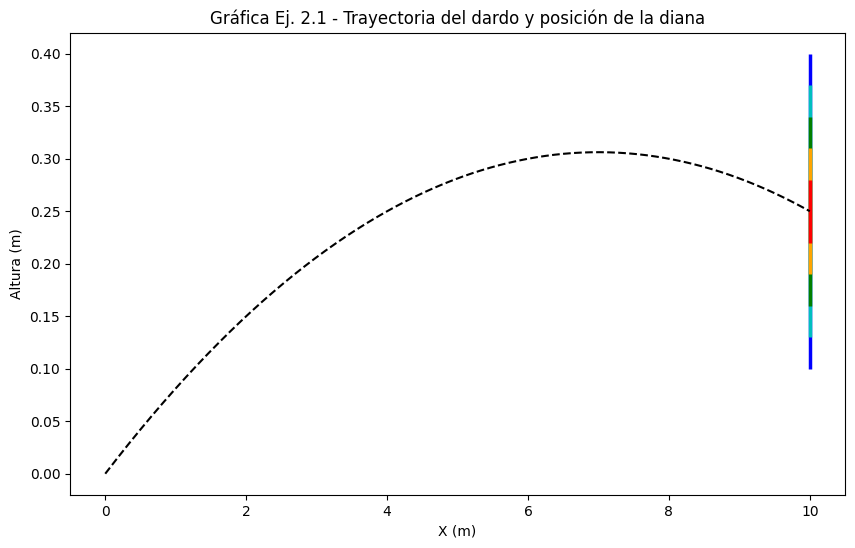

La velocidad calculada es: v0 = 28.12 m/s


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función para la trayectoria del dardo y(x)
def y(x, theta, v):
    # Ecuación de la trayectoria parabólica sin resistencia del aire
    return np.tan(theta)*x - (9.81*x**2)/(2.*(v**2)*(np.cos(theta))**2)

g = 9.81  # Aceleración de la gravedad en m/s²
th0 = 5. * np.pi / 180.  # Ángulo de tiro convertido a radianes (5 grados)
y_c = 0.25  # Diferencia de altura entre diana y punto de lanzamiento (1.75 - 1.5 m)
d = 10  # Distancia horizontal hasta la diana en metros

# Cálculo de la velocidad inicial para que el dardo llegue justo a y_c en x=d
v0 = np.sqrt(g * d**2 / (2 * np.cos(th0)**2 * (np.tan(th0)*d - y_c)))

# Generamos puntos para graficar la trayectoria desde x=0 hasta x=10 m
x_plot = np.linspace(0, 10, 1000)
y_plot = y(x_plot, th0, v0)

plt.figure(figsize=(10,6))

# Dibujamos la diana en la posición x=d con las diferentes secciones de puntuación
# Cada sección está separada por 3 cm (0.03 m), coloreadas para distinguir
plt.vlines(d, ymin=y_c-0.15, ymax=y_c+0.15, lw=2.5, color='b')      # borde exterior (5 secciones de 3cm)
plt.vlines(d, ymin=y_c-0.12, ymax=y_c+0.12, lw=2.5, color='c')
plt.vlines(d, ymin=y_c-0.09, ymax=y_c+0.09, lw=2.5, color='g')
plt.vlines(d, ymin=y_c-0.06, ymax=y_c+0.06, lw=2.5, color='orange')
plt.vlines(d, ymin=y_c-0.03, ymax=y_c+0.03, lw=2.5, color='r')      # centro de la diana (máxima puntuación)
"""
plt.vlines(
    d,               # # Posición en el eje x donde quieres dibujar la línea vertical (aquí la diana está a 10 m)
    ymin=y_c - 0.15, # # Altura mínima en el eje y desde donde empieza la línea (un poco abajo del centro de la diana)
    ymax=y_c + 0.15, # # Altura máxima en el eje y donde termina la línea (un poco arriba del centro)
    lw=2.5,          # # Grosor (linewidth) de la línea para que sea visible y no muy fina ni muy gruesa
    color='b'        # # Color de la línea ('b' para azul), útil para distinguir diferentes secciones o zonas
)
d                 # # posición horizontal exacta donde dibujar la línea, en metros (diana a 10 m)
ymin=y_c - 0.15   # # límite inferior vertical, ajustado para cubrir la sección que quieres mostrar
ymax=y_c + 0.15   # # límite superior vertical, para delimitar la altura de esa sección en la diana
lw=2.5            # # ancho de la línea, para que se vea bien en la gráfica
color='b'         # # color para que la línea destaque y diferencie esa sección visualmente

"""
# Graficamos la trayectoria del dardo
plt.plot(x_plot, y_plot, 'k--')

# Añadimos título y etiquetas
plt.title('Gráfica Ej. 2.1 - Trayectoria del dardo y posición de la diana')
plt.xlabel('X (m)')
plt.ylabel('Altura (m)')

plt.show()

# Mostrar la velocidad calculada en la consola
print("La velocidad calculada es: v0 = {0:.2f} m/s".format(v0))


**2.2 [1.25 puntos]:** Aunque sepas calcular, sabes que no eres muy preciso tirando dardos... De hecho, tus tiros tienen una $v_0$ de salida promedio de unos 25 m/s y un $\theta_0$ promedio de $5º$, que siguen unas distribuciones normales, centradas en los valores de $\theta_0$ y $v_0$, y con unas desviaciones estandares de un $20\%$ relativo para los dos casos, cuando realizas múltiples tiros...

Estima la probabilidad de darle al centro, con una precisión del $1\%$. Para calcularla, repite esta experiencia muchas veces ($N_{tiros}$). Quieres estimar la probabilidad $\hat{p}$ de que el dardo de en el centro. Dibuja como evoluciona el error relativo (es decir, $\sigma[\hat{p}]/\hat{p}$, en porcentaje) con el número de dardos tirados hasta que este error sea $<1\%$. Cuántas simulaciones tienes que hacer para esta estimación de $\hat{p}$ con un error menor del $1\%$? Cuál es la probabilidad $\hat{p}$ que obtienes al final, y su error $\sigma[\hat{p}]$? (recuerda que tienes infinitos dardos a tu disposición en una simulación...). **NOTA:** Que un dardo de o no en el centro sigue una distribución binomial, donde los estimadores de $\hat{p}$ y varianza de $\hat{p}$ son:

$$
\hat{p} = \frac{N_{centro}}{N_{tiros}}
\\
$$

$$
var[\hat{p}] = \frac{p(1-p)}{N_{tiros}} ; \,\,\,\ \sigma[\hat{p}] = \sqrt{var[\hat{p}]}
\\
$$

/tmp/ipython-input-13-1237064958.py:50: RuntimeWarning: invalid value encountered in scalar divide
  errp.append(100. * np.sqrt(p_tmp * (1 - p_tmp) / nt) / p_tmp)


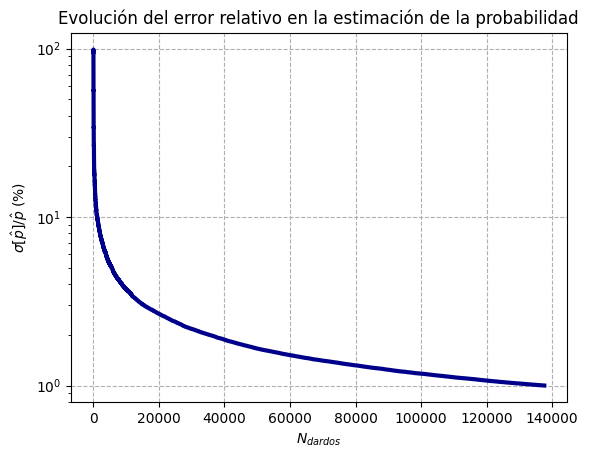

Número de dardos simulados: 137583
Probabilidad estimada p: 6.7763 ± 0.0678 %
Error relativo σ(p)/p: 1.00 %


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular la altura del dardo en x, dado ángulo y velocidad
def y(x, theta, v):
    return np.tan(theta)*x - (9.81*x**2)/(2.*(v**2)*(np.cos(theta))**2)

g = 9.81              # gravedad en m/s²
th0 = 5.*np.pi/180.   # ángulo promedio en radianes (5 grados)
y_c = 0.25            # altura del centro de la diana relativo al punto de lanzamiento
d = 10                # distancia horizontal a la diana en metros
v0 = 25               # velocidad promedio de salida en m/s

Ntiros = 1000000      # número máximo de tiros simulados (puedes parar antes)

ncenter = 0           # contador de tiros que aciertan en el centro
p = []                # lista para almacenar la probabilidad estimada en cada paso
varp = []             # lista para varianza de la estimación
stdp = []             # lista para desviación estándar de la estimación
nt_t = []             # lista para número de tiros realizados
errp = []             # lista para error relativo porcentual de la estimación

for nt in range(1, Ntiros+1):
    # Generar un ángulo de tiro con distribución normal centrado en th0, desviación 20%
    th = th0 + np.random.normal(0, 0.2*th0)

    # Generar una velocidad con distribución normal centrada en v0, desviación 20%
    v = v0 + np.random.normal(0, 0.2*v0)

    # Calcular la altura del dardo en la distancia d
    y_test = y(d, th, v)

    # Comprobar si el dardo cae dentro de 3 cm (0.03 m) del centro en altura
    if np.abs(y_test - y_c) < 0.03:
        ncenter += 1

    # Probabilidad estimada hasta ahora (número de aciertos dividido por tiros)
    p_tmp = ncenter / nt

    # Guardar la probabilidad estimada
    p.append(p_tmp)

    # Varianza estimada de la probabilidad (binomial)
    varp.append(p_tmp * (1 - p_tmp) / nt)

    # Desviación estándar de la estimación
    stdp.append(np.sqrt(p_tmp * (1 - p_tmp) / nt))

    # Error relativo porcentual: (sigma[p^]/p^) * 100
    errp.append(100. * np.sqrt(p_tmp * (1 - p_tmp) / nt) / p_tmp)

    # Guardar número de tiros actual
    nt_t.append(nt)

    # Romper el ciclo si el error relativo es menor al 1% después de 100 tiros
    if nt > 100 and errp[-1] < 1.0:
        break

# Graficar la evolución del error relativo en escala logarítmica
plt.plot(nt_t, errp, color='darkblue', lw=3)
plt.xlabel('$N_{dardos}$')
plt.ylabel('$\sigma[\hat{p}]/\hat{p}$ (%)')
plt.yscale('log')
plt.grid(True, linestyle="--")
plt.title('Evolución del error relativo en la estimación de la probabilidad')
plt.show()

# Imprimir resultados finales
print("Número de dardos simulados: {}".format(nt_t[-1]))
print("Probabilidad estimada p: {0:.4f} ± {1:.4f} %".format(100.*p[-1], 100.*stdp[-1]))
print("Error relativo σ(p)/p: {0:.2f} %".format(errp[-1]))


**2.3 [1 punto]:** Si realizas los tiros siguiendo el patrón del apartado 2.2, haz una distribución de probabilidad de la puntuación obtenida tirando los 3 dardos de los que dispones en cada uno de tus turnos. Para ello, simula unas 500k realizaciones de tus turnos de tiro. Cual es la puntuación más probable de obtener y cuál es su probabilidad? Las puntuaciones van desde 0 (todos los dardos fuera) hasta 15 (todos los dardos en el centro). Aquellos dardos que den justo en la linea de separación de regiones, cuenta la puntuación más alta...

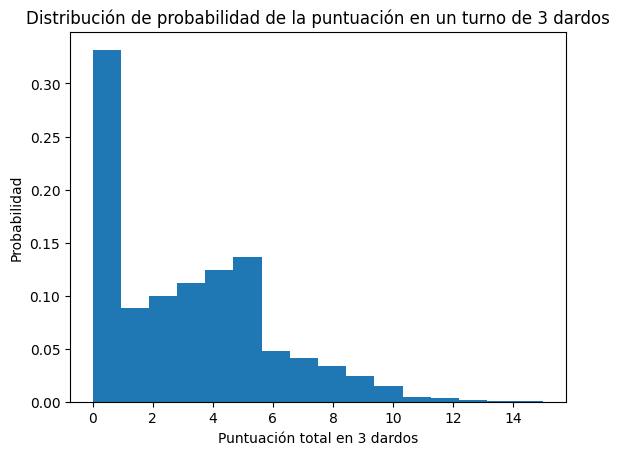

La puntuación más probable es 0, con una probabilidad del 33.18 %


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular la altura y(x) del dardo en función de x, ángulo theta y velocidad v
def y(x, theta, v):
    # Trayectoria parabólica sin fricción de aire
    return np.tan(theta)*x - (9.81*x**2)/(2.*(v**2)*(np.cos(theta))**2)

g = 9.81                  # gravedad en m/s²
th0 = 5.*np.pi/180.       # ángulo promedio de lanzamiento en radianes (5 grados)
y_c = 0.25                # altura del centro de la diana (1.75 m - 1.5 m)
d = 10                    # distancia horizontal a la diana en metros
v0 = 25                   # velocidad promedio de salida en m/s

Ntiros = 500000           # número de simulaciones de turnos de 3 dardos

punt_f = []               # lista para almacenar la puntuación total de cada turno

# Loop para simular Ntiros turnos de 3 dardos cada uno
for nt in range(1, Ntiros+1):

    punt = 0              # inicializar puntuación total del turno en 0

    # Simular los 3 dardos lanzados en el turno
    for dard in range(1,4):
        # Generar ángulo y velocidad con distribución normal alrededor de th0 y v0 (20% desviación)
        th = th0 + np.random.normal(0, 0.2*th0)
        v = v0 + np.random.normal(0, 0.2*v0)

        # Calcular la altura del dardo en la distancia d
        y_test = y(d, th, v)

        # Calcular la distancia vertical entre el impacto y el centro de la diana
        dist = np.abs(y_test - y_c)

        # Determinar la puntuación según el radio al centro (cada 3 cm cambia la puntuación)
        # Se incluye el caso de que si el dardo cae justo en la línea de separación,
        # se le asigna la puntuación mayor (por eso se usa <= en lugar de <)
        if dist <= 0.03:         # radio <= 3 cm → puntuación máxima 5
            p = 5
        elif dist <= 0.06:       # entre 3 y 6 cm → puntuación 4
            p = 4
        elif dist <= 0.09:       # entre 6 y 9 cm → puntuación 3
            p = 3
        elif dist <= 0.12:       # entre 9 y 12 cm → puntuación 2
            p = 2
        elif dist <= 0.15:       # entre 12 y 15 cm → puntuación 1
            p = 1
        else:                   # fuera de 15 cm → puntuación 0
            p = 0

        punt += p               # sumar la puntuación de este dardo a la puntuación total del turno

    punt_f.append(punt)         # añadir la puntuación total del turno a la lista

# Una vez simulados todos los turnos, calcular la distribución de probabilidad de las puntuaciones
# bins=16 para cubrir de 0 a 15 puntos (inclusive)
# density=True para que el área total del histograma sea 1 (distribución de probabilidad)
n, bins, patches = plt.hist(punt_f, bins=16, range=(0,15), density=True)

# Etiquetas y título del gráfico de la distribución de probabilidad
plt.ylabel("Probabilidad")
plt.xlabel("Puntuación total en 3 dardos")
plt.title("Distribución de probabilidad de la puntuación en un turno de 3 dardos")
plt.show()

# Identificar la puntuación más probable (modo de la distribución)
elem = np.argmax(n)

# Mostrar la puntuación más probable y su probabilidad en porcentaje
print("La puntuación más probable es {0}, con una probabilidad del {1:.2f} %".format(elem, 100.*n[elem]))


## <font color='green'>**> Ejercicio #3 [3 puntos]**</font>

Tienes una baraja de 52 cartas (4 palos de 13 cartas). Las barajas y descartas las 4 primeras cartas, sin mirar qué cartas son. En su lugar pones 4 reyes que has sacado de otra baraja. Vuelves a barajar, y descubres las N primeras cartas.

**3.1 [1.5 puntos]:** Cuál es la probabilidad de que la primera carta que descubras sea un rey?

Para calcular una probabilidad de este tipo podemos usar la definición frecuentista, en la que para un número $N$ de realizaciones del experimento se calcula la probabilidad como:

$$
P(A) = \frac{\text{# de veces que ha ocurrido A}}{N}
$$

que tiende al valor real si $N \to \infty$.

Implementaremos un algoritmo que simula de $N=1$ a $N=50000$ realizaciones de este experimento y cuenta cuántas veces ocurre que salga 1 rey como primera carta.

Genera una gráfica mostrando cómo evoluciona la probabilidad P a medida que $N$ aumenta (de 1 a 50000). Puedes ver mejor esta gráfica si haces que el eje x esté en escala logarítmica.

>**Nota** Para modelizar este escenario tendrás que utilizar herramientas de generación y manipulación de arrays. Puedes generar un array de 52 números enteros que se correspondan a cada carta de la baraja. Para barajar un array $a$ puedes usar el método ``random.shuffle(a)``, y luego manipular las primeras entradas para poner 4 reyes, y volver a aplicar el ``random.shuffle(a)``...

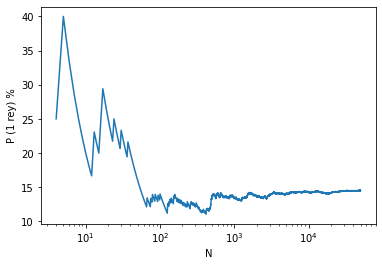

La Probabilidad es del 14.51 %


In [ ]:
# Ejercicio 3.1

a = []
N = []

N_r = 0
N_1R = 0

for i in np.arange(1,50e3):
  N_r+=1
  card_list = np.arange(1,53) # creamos la baraja
#  print(card_list)
  random.shuffle(card_list) #1st shuffle method

#  print(card_list)
# Descartamos las 4 primeras cartas, y sustituimos por los otros reyes
  card_list[0] = 13
  card_list[1] = 26
  card_list[2] = 39
  card_list[3] = 52
#  print(card_list)

  random.shuffle(card_list) #2nd shuffle method

#  print(card_list)
  if (card_list[0] % 13 == 0): N_1R +=1

  if (N_1R != 0):
    N.append(N_r)
    a.append(100.*N_1R/N_r)

plt.plot(N,a)
plt.xlabel("N")
plt.ylabel("P (1 rey) %")
plt.xscale("log")
plt.show()

print("La Probabilidad es del {0:.2f} %".format(a[-1]))


**3.2 [1.5 puntos]:** Repite el apartado anterior para producir un histograma con las probabilidades de que las primeras N cartas que se descubran sean reyes. Es decir, un histograma entre 1 y 8, ya que el máximo de reyes que podrías sacar de forma consecutiva podrían ser 8... 50000 realizaciones es suficiente, o tendrías que hacer más para que hacer converger mejor el caso más extremo de 8 reyes? Puede ser que tengas que usar escala logarítmica en el eje $y$...

Not enough stats - la Probabilidad de 6 reyes es del 0.00 %
Not enough stats - la Probabilidad de 7 reyes es del 0.00 %
Not enough stats - la Probabilidad de 8 reyes es del 0.00 %


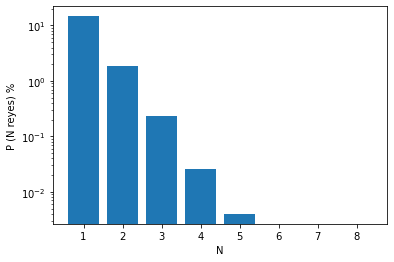

In [ ]:
# Ejercicio 3.2

a1, a2, a3, a4, a5, a6, a7, a8 = ([] for i in range(8))
N1, N2, N3, N4, N5, N6, N7, N8 = ([] for i in range(8))

N_r = 0
N_1R = N_2R = N_3R = N_4R = N_5R = N_6R = N_7R = N_8R = 0

for i in np.arange(1,50e3):
  N_r+=1
  card_list = np.arange(1,53) # creamos la baraja
  random.shuffle(card_list) #1st shuffle method

# Descartamos las 4 primeras cartas, y sustituimos por los otros reyes
  card_list[0] = 13
  card_list[1] = 26
  card_list[2] = 39
  card_list[3] = 52

  random.shuffle(card_list) #2nd shuffle method

  if (card_list[0] % 13 == 0): N_1R +=1
  if (card_list[0] % 13 == 0 and card_list[1] % 13 == 0): N_2R +=1
  if (card_list[0] % 13 == 0 and card_list[1] % 13 == 0 and card_list[2] % 13 == 0): N_3R +=1
  if (card_list[0] % 13 == 0 and card_list[1] % 13 == 0 and card_list[2] % 13 == 0 and card_list[3] % 13 == 0): N_4R +=1
  if (card_list[0] % 13 == 0 and card_list[1] % 13 == 0 and card_list[2] % 13 == 0 and card_list[3] % 13 == 0 and card_list[4] % 13 == 0): N_5R +=1
  if (card_list[0] % 13 == 0 and card_list[1] % 13 == 0 and card_list[2] % 13 == 0 and card_list[3] % 13 == 0 and card_list[4] % 13 == 0 and card_list[5] % 13 == 0): N_6R +=1
  if (card_list[0] % 13 == 0 and card_list[1] % 13 == 0 and card_list[2] % 13 == 0 and card_list[3] % 13 == 0 and card_list[4] % 13 == 0 and card_list[5] % 13 == 0 and card_list[6] % 13 == 0): N_7R +=1
  if (card_list[0] % 13 == 0 and card_list[1] % 13 == 0 and card_list[2] % 13 == 0 and card_list[3] % 13 == 0 and card_list[4] % 13 == 0 and card_list[5] % 13 == 0 and card_list[6] % 13 == 0 and card_list[7] % 13 == 0): N_8R +=1


  if (N_1R != 0):
    N1.append(N_r)
    a1.append(100.*N_1R/N_r)
  if (N_2R != 0):
    N2.append(N_r)
    a2.append(100.*N_2R/N_r)
  if (N_3R != 0):
    N3.append(N_r)
    a3.append(100.*N_3R/N_r)
  if (N_4R != 0):
    N4.append(N_r)
    a4.append(100.*N_4R/N_r)
  if (N_5R != 0):
    N5.append(N_r)
    a5.append(100.*N_5R/N_r)
  if (N_6R != 0):
    N6.append(N_r)
    a6.append(100.*N_6R/N_r)
  if (N_7R != 0):
    N7.append(N_r)
    a7.append(100.*N_7R/N_r)
  if (N_8R != 0):
    N8.append(N_r)
    a8.append(100.*N_8R/N_r)

if len(a1) == 0:
  a1.append(0)
  print("Not enough stats - la Probabilidad de 1 rey es del {0:.2f} %".format(a1[-1]))
if len(a2) == 0:
  a2.append(0)
  print("Not enough stats - la Probabilidad de 2 reyes es del {0:.2f} %".format(a2[-1]))
if len(a3) == 0:
  a3.append(0)
  print("Not enough stats - la Probabilidad de 3 reyes es del {0:.2f} %".format(a3[-1]))
if len(a4) == 0:
  a4.append(0)
  print("Not enough stats - la Probabilidad de 4 reyes es del {0:.2f} %".format(a4[-1]))
if len(a5) == 0:
  a5.append(0)
  print("Not enough stats - la Probabilidad de 5 reyes es del {0:.2f} %".format(a5[-1]))
if len(a6) == 0:
  a6.append(0)
  print("Not enough stats - la Probabilidad de 6 reyes es del {0:.2f} %".format(a6[-1]))
if len(a7) == 0:
  a7.append(0)
  print("Not enough stats - la Probabilidad de 7 reyes es del {0:.2f} %".format(a7[-1]))
if len(a8) == 0:
  a8.append(0)
  print("Not enough stats - la Probabilidad de 8 reyes es del {0:.2f} %".format(a8[-1]))

x = np.arange(1,9)
y = [a1[-1], a2[-1], a3[-1], a4[-1], a5[-1], a6[-1], a7[-1], a8[-1]]

plt.bar(x,y)
plt.xlabel("N")
plt.ylabel("P (N reyes) %")
plt.yscale('log')
plt.show()